## Web scrape PAOK FC website  

<img src="paok_badge.png" width="256" height="256">


## Webscraping  player stats for season 2024-2025

In [1]:
import pandas as pd
import numpy as np
import requests
# from tqdm import tqdm
from time import sleep
import re
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
basic_url = "https://www.paokfc.gr/a-omada/a-omada/a-team-roster/"

In [3]:
headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.199 Safari/537.36"}

In [4]:
response = requests.get(basic_url,headers=headers)

In [5]:
response.status_code

200

In [6]:
soup = BeautifulSoup(response.content, 'html.parser')

## Finding all the players' urls

In [7]:
squad_soup = soup.find('article', {'class': "main-section teamplayers-category"}).\
                find('div',{'class': "row the-content teamplayers-category-content"}).\
                findAll('section', {'class' : "col-lg-12 teamplayers-section teamplayers-goalkeepers"})
              

squad_tags=[] 
for url in squad_soup:
    squad_tags.append(url.find_all('a')) #its length is 4(each position category)
    
# Initialize an empty list to store the URLs
squad_urls = []

# Iterate over each category
for category in squad_tags:
    # Iterate over each <a> tag in the category
    for a_tag in category:
        # Check if the tag has an 'href' attribute and it's not '#'
        if a_tag.has_attr('href') and a_tag['href'] != '#':
            squad_urls.append(a_tag['href']+"?template=stats")

squad_urls


['https://www.paokfc.gr/profiles/jiri-pavlenka-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/dimitrios-monastirlis-2/?template=stats',
 'https://www.paokfc.gr/profiles/dominik-kotarski-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/konstantinos-mpalomenos-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/antonis-tsiftsis-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/giannis-michailidis/?template=stats',
 'https://www.paokfc.gr/profiles/dejan-lovren-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/omar-colley-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/tomasz-kedziora/?template=stats',
 'https://www.paokfc.gr/profiles/jonathan-g%ce%bfmez-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/jonny-castro-otto/?template=stats',
 'https://www.paokfc.gr/profiles/abdul-rahman-baba/?template=stats',
 'https://www.paokfc.gr/profiles/joan-sastre-vanrell/?template=stats',
 'https://www.paokfc.gr/profiles/konstantinos-thymianis

## Finding stats for an individual player

In [8]:
test_url = "https://www.paokfc.gr/profiles/tomasz-kedziora/?template=stats"
test_response = requests.get(test_url, headers=headers)
test_soup = BeautifulSoup(test_response.content, 'html.parser')

In [9]:
# Name of the player

name = test_soup.find('div', {'class': "row the-content single-profile-content"}).\
        find('section', {'class': "col-sm-12 single-profile-header"}).\
        find('h1').text
name

'Tomasz Kedziora'

In [10]:
stats = test_soup.findAll('section', {'class':"statistics-section"})
        

row_stats = []
for stat in stats[:6]:
#Until 6th 'cause the rest of the list contains the stats for mobile and tablet version
    row_stats.append(stat.findAll('section',{'class': "row stats"}))

In [11]:
row_stats


[[<section class="row stats">
  <div class="col-sm-6">
  <h2>Εμφανίσεις</h2>
  <div class="numerical large">22</div>
  </div>
  <div class="col-sm-6">
  <h2>Λεπτά συμμετοχής</h2>
  <div class="numerical large">2181'</div>
  </div>
  </section>],
 [<section class="row stats">
  <h2>Γκολ</h2>
  <div class="numerical large">0</div>
  </section>,
  <section class="row stats">
  <div class="col-sm-6">
  <h2>Σουτ</h2>
  <div class="circular">
  <div class="circlestat" data-bgcolor="#cfcfcf" data-bordersize="15" data-dimension="180" data-fgcolor="#ff6d00" data-fontsize="38" data-percent="66.666666666667">
  <div class="total">3</div>
  </div>
  <div class="legend orange">
  <span>Εντός Περιοχής</span>
  <span class="numerical small">2</span>
  </div>
  <div class="legend">
  <span>Εκτός Περιοχής</span>
  <span class="numerical small">1</span>
  </div>
  </div>
  </div>
  <div class="col-sm-6">
  <h2>Γκολ / Τελική προσπάθεια</h2>
  <div class="circular">
  <div class="circlestat" data-bgcolor=

In [12]:
stats_titles = []

for stat in row_stats:
    for element in stat:
        h2_tags = element.find_all('h2')
        for h2_tag in h2_tags:
            if h2_tag.text:
                stats_titles.append(h2_tag.text)

            


In [13]:
stats_titles

['Εμφανίσεις',
 'Λεπτά συμμετοχής',
 'Γκολ',
 'Σουτ',
 'Γκολ / Τελική προσπάθεια',
 'Δοκάρια',
 'Χαμένες Ευκαιρίες',
 'Πάσες',
 'Ασίστ',
 'Γεμίσματα',
 'Εύστοχα Γεμίσματα',
 'Κλεψίματα',
 'Επεμβάσεις',
 'Κίτρινες',
 'Κόκκινες']

In [14]:
# all the stat numbers except fouls
stats_numbers = []
for stat in row_stats:
    for element in stat:
        div_tags = element.find_all('div', class_= lambda x: ('numerical' in x) or ('total' in x))
        for div_tag in div_tags:
            stats_numbers.append(div_tag.text)
stats_numbers.pop(-3)

'20'

In [15]:
stats_numbers

['22',
 "2181'",
 '0',
 '3',
 '0/92',
 '0',
 '0',
 '572',
 '0',
 '5',
 '3',
 '64',
 '41',
 '1',
 '0']

In [16]:
temp=dict(zip(stats_titles,stats_numbers))
temp

{'Εμφανίσεις': '22',
 'Λεπτά συμμετοχής': "2181'",
 'Γκολ': '0',
 'Σουτ': '3',
 'Γκολ / Τελική προσπάθεια': '0/92',
 'Δοκάρια': '0',
 'Χαμένες Ευκαιρίες': '0',
 'Πάσες': '572',
 'Ασίστ': '0',
 'Γεμίσματα': '5',
 'Εύστοχα Γεμίσματα': '3',
 'Κλεψίματα': '64',
 'Επεμβάσεις': '41',
 'Κίτρινες': '1',
 'Κόκκινες': '0'}

In [17]:
#Fouls
fouls = test_soup.findAll('div', {'class': "circular"})
foul_stats = fouls[8].find_all('div', class_ = lambda x: x and ('total' in x) or ('legend' in x))

total_fouls = int(foul_stats[0].text)
fouls_drawn = int(foul_stats[1].find('span',{'class':"numerical small"}).text)
fouls_committed =total_fouls-fouls_drawn

temp.update({
    'Συνολικά Φάουλ':total_fouls,
    'Φάουλ Υπέρ':fouls_drawn,
    'Φάουλ Κατά':fouls_committed
})

temp

{'Εμφανίσεις': '22',
 'Λεπτά συμμετοχής': "2181'",
 'Γκολ': '0',
 'Σουτ': '3',
 'Γκολ / Τελική προσπάθεια': '0/92',
 'Δοκάρια': '0',
 'Χαμένες Ευκαιρίες': '0',
 'Πάσες': '572',
 'Ασίστ': '0',
 'Γεμίσματα': '5',
 'Εύστοχα Γεμίσματα': '3',
 'Κλεψίματα': '64',
 'Επεμβάσεις': '41',
 'Κίτρινες': '1',
 'Κόκκινες': '0',
 'Συνολικά Φάουλ': 20,
 'Φάουλ Υπέρ': 8,
 'Φάουλ Κατά': 12}

## Finding the stats for all players

In [18]:
df = pd.DataFrame()
for url in (squad_urls):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    #name of each player
    name = soup.find('div', {'class': "row the-content single-profile-content"}).\
        find('section', {'class': "col-sm-12 single-profile-header"}).\
        find('h1').text
    
    stats = soup.findAll('section', {'class':"statistics-section"})
        
    #list with names of each stat
    row_stats = []
    for stat in stats[:6]:
    #Until 6th 'cause the rest of the list contains the stats for mobile and tablet version
        row_stats.append(stat.findAll('section',{'class': "row stats"}))
        
    stats_titles = []
    
    #list with the numbers for each stat
    for stat in row_stats:
        for element in stat:
            h2_tags = element.find_all('h2')
            for h2_tag in h2_tags:
                if h2_tag.text:
                    stats_titles.append(h2_tag.text)
                    
    # all the stat numbers except fouls
    stats_numbers = []
    for stat in row_stats:
        for element in stat:
            div_tags = element.find_all('div', class_= lambda x: ('numerical' in x) or ('total' in x))
            for div_tag in div_tags:
                stats_numbers.append(div_tag.text)
    stats_numbers.pop(-3) # exclude foul number
    
    #Fouls
    fouls = soup.findAll('div', {'class': "circular"})
    foul_stats = fouls[8].find_all('div', class_ = lambda x: x and ('total' in x) or ('legend' in x))

    total_fouls = int(foul_stats[0].text)
    fouls_drawn = int(foul_stats[1].find('span',{'class':"numerical small"}).text)
    fouls_committed =total_fouls-fouls_drawn

    # Creating a dict with the stats for each player to concat it in the df
    temp={
        'Όνομα':name
    }
    
    temp.update(dict(zip(stats_titles,stats_numbers)))
    
    temp.update({
        'Συνολικά Φάουλ':total_fouls,
        'Φάουλ Υπέρ':fouls_drawn,
        'Φάουλ Κατά':fouls_committed
        })
    
    
    # Filling the dataframe with the stats of the players
    df = pd.concat([df, pd.DataFrame([temp])], axis=0, ignore_index=True)
    
    sleep(1.5) #use sleep to avoid overwhelming the server

In [19]:
df

,Όνομα,Εμφανίσεις,Λεπτά συμμετοχής,Γκολ,Σουτ,Γκολ / Τελική προσπάθεια,Δοκάρια,Χαμένες Ευκαιρίες,Πάσες,Ασίστ,Γεμίσματα,Εύστοχα Γεμίσματα,Κλεψίματα,Επεμβάσεις,Κίτρινες,Κόκκινες,Συνολικά Φάουλ,Φάουλ Υπέρ,Φάουλ Κατά,Αποκρούσεις
0,Jiri Pavlenka,0,0',0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,Δημήτριος Μοναστηρλής,0,0',0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,Dominik Kotarski,26,2571',0,0,0/0,0,0,5,0,1,0,35,18,0,0,3,3,0,78
3,Κωνσταντίνος Μπαλωμένος,0,0',0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,Αντώνης Τσιφτσής,1,96',0,0,0/0,0,0,0,0,0,0,1,2,0,0,0,0,0,2
5,Γιάννης Μιχαηλίδης,11,1018',0,5,0/8,0,0,184,0,9,2,26,25,4,0,21,12,9,NaN
6,Dejan Lovren,5,480',0,0,0/4,0,0,2,0,2,1,6,21,1,0,7,2,5,NaN
7,Omar Colley,10,860',0,2,0/3,0,0,184,0,0,0,27,31,1,0,14,9,5,NaN
8,Tomasz Kedziora,22,2181',0,3,0/92,0,0,572,0,5,3,64,41,1,0,20,8,12,NaN
9,Jonathan Gοmez,2,177',0,2,0/2,0,0,4,0,4,1,3,1,2,0,7,3,4,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Όνομα                     29 non-null     object
 1   Εμφανίσεις                29 non-null     object
 2   Λεπτά συμμετοχής          29 non-null     object
 3   Γκολ                      29 non-null     object
 4   Σουτ                      29 non-null     object
 5   Γκολ / Τελική προσπάθεια  29 non-null     object
 6   Δοκάρια                   29 non-null     object
 7   Χαμένες Ευκαιρίες         29 non-null     object
 8   Πάσες                     29 non-null     object
 9   Ασίστ                     29 non-null     object
 10  Γεμίσματα                 29 non-null     object
 11  Εύστοχα Γεμίσματα         29 non-null     object
 12  Κλεψίματα                 29 non-null     object
 13  Επεμβάσεις                29 non-null     object
 14  Κίτρινες                  29

In [21]:
#creating a copy of the df and convert values to int
df2 = df.astype(dtype='int64', errors='ignore').copy()

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Όνομα                     29 non-null     object
 1   Εμφανίσεις                29 non-null     int64 
 2   Λεπτά συμμετοχής          29 non-null     object
 3   Γκολ                      29 non-null     int64 
 4   Σουτ                      29 non-null     int64 
 5   Γκολ / Τελική προσπάθεια  29 non-null     object
 6   Δοκάρια                   29 non-null     int64 
 7   Χαμένες Ευκαιρίες         29 non-null     int64 
 8   Πάσες                     29 non-null     int64 
 9   Ασίστ                     29 non-null     int64 
 10  Γεμίσματα                 29 non-null     int64 
 11  Εύστοχα Γεμίσματα         29 non-null     int64 
 12  Κλεψίματα                 29 non-null     int64 
 13  Επεμβάσεις                29 non-null     int64 
 14  Κίτρινες                  29

In [23]:
#Converting minutes played by each player to int
df2['Λεπτά συμμετοχής']  = df2['Λεπτά συμμετοχής'].str.findall(r"\d+").str[0].astype(int)

In [24]:
df2['Λεπτά συμμετοχής']

0        0
1        0
2     2571
3        0
4       96
5     1018
6      480
7      860
8     2181
9      177
10    1684
11    2014
12    1067
13      22
14    1556
15    1756
16     346
17    1037
18     170
19    1680
20    1821
21     306
22    1072
23    1512
24    1819
25     981
26     134
27     602
28    1328
Name: Λεπτά συμμετοχής, dtype: int64

In [25]:
# Top 10 scorers

ax =df2.sort_values(by='Γκολ', ascending = False).head(10)

ax

,Όνομα,Εμφανίσεις,Λεπτά συμμετοχής,Γκολ,Σουτ,Γκολ / Τελική προσπάθεια,Δοκάρια,Χαμένες Ευκαιρίες,Πάσες,Ασίστ,Γεμίσματα,Εύστοχα Γεμίσματα,Κλεψίματα,Επεμβάσεις,Κίτρινες,Κόκκινες,Συνολικά Φάουλ,Φάουλ Υπέρ,Φάουλ Κατά,Αποκρούσεις
11,Abdul Rahman Baba,24,2014,7,18,7/20,1,2,402,1,38,20,67,22,5,0,37,21,16,1
28,Kiril Despodov,26,1328,7,30,7/30,1,0,144,7,94,44,18,5,2,0,45,21,24,NaN
25,Tarik Tissoudali,22,981,6,15,6/18,1,0,49,1,10,7,17,3,3,0,27,8,19,NaN
23,Taison Barcellos Freda,21,1512,6,33,6/34,0,0,326,1,53,31,45,2,0,0,30,19,11,NaN
24,Andrija Zivkovic,25,1819,6,35,6/36,0,1,389,7,122,74,50,13,3,0,36,21,15,NaN
14,Mady Camara,26,1556,5,19,5/26,0,0,365,2,9,5,53,17,8,0,52,22,30,NaN
19,Stefan Schwab,25,1680,4,23,4/27,0,0,283,2,28,15,43,10,3,0,39,18,21,NaN
22,Fedor Chalov,22,1072,4,22,4/26,3,1,82,3,8,4,15,5,0,0,24,14,10,NaN
17,Thomas Murg,18,1037,3,23,3/23,1,0,134,2,31,8,16,5,1,0,15,7,8,NaN
21,Shola Shoretire,12,306,3,4,3/5,0,0,37,0,15,7,3,0,0,0,11,5,6,NaN


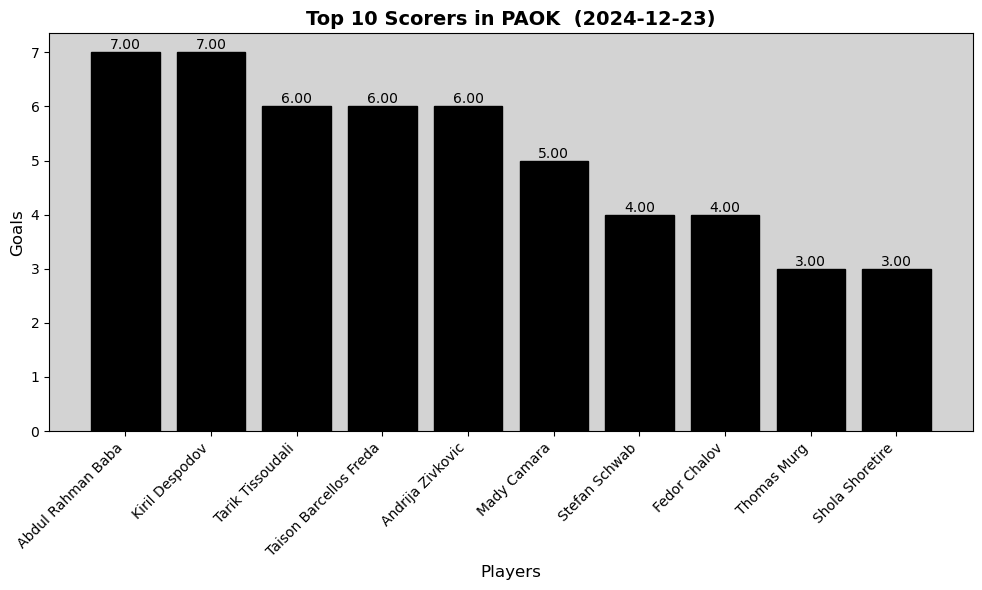

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(
    ax["Όνομα"], 
    ax["Γκολ"], 
    color="black",  
    edgecolor="black" 
)

# Adding annotations on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, \
             f"{yval:.2f}", ha='center', va='bottom', fontsize=10, color="black")

# Adding Titles and Labels
plt.title(f"Top 10 Scorers in PAOK  ({datetime.today().strftime('%Y-%m-%d')})", \
          fontsize=14, fontweight='bold', color="black")
plt.xlabel("Players", fontsize=12, color="black")
plt.ylabel("Goals", fontsize=12, color="black")
plt.xticks(rotation=45, ha='right', fontsize=10, color="black")  
plt.tight_layout()


plt.gca().set_facecolor("lightgray")  
plt.show()

In [27]:
df2['Τελική προσπάθεια'] = df2['Γκολ / Τελική προσπάθεια'].str.split('/',expand=True)[1]

In [28]:
df2['Τελική προσπάθεια'] = pd.to_numeric(df2['Τελική προσπάθεια'])

In [29]:
df2['Ποσοστό ευστοχίας'] = round(df2['Γκολ']/ df2['Τελική προσπάθεια']*100,2)

In [30]:
print('Top 10 players based on accuracy')
top10_acc = df2.sort_values(by='Ποσοστό ευστοχίας',ascending=False).\
            head(10)[['Όνομα','Γκολ','Τελική προσπάθεια','Ποσοστό ευστοχίας']].reset_index()
top10_acc

Top 10 players based on accuracy


,index,Όνομα,Γκολ,Τελική προσπάθεια,Ποσοστό ευστοχίας
0,21,Shola Shoretire,3,5,60.00
1,11,Abdul Rahman Baba,7,20,35.00
2,25,Tarik Tissoudali,6,18,33.33
3,27,Brandon Thomas Llamas,2,8,25.00
4,28,Kiril Despodov,7,30,23.33
5,14,Mady Camara,5,26,19.23
6,23,Taison Barcellos Freda,6,34,17.65
7,24,Andrija Zivkovic,6,36,16.67
8,22,Fedor Chalov,4,26,15.38
9,19,Stefan Schwab,4,27,14.81


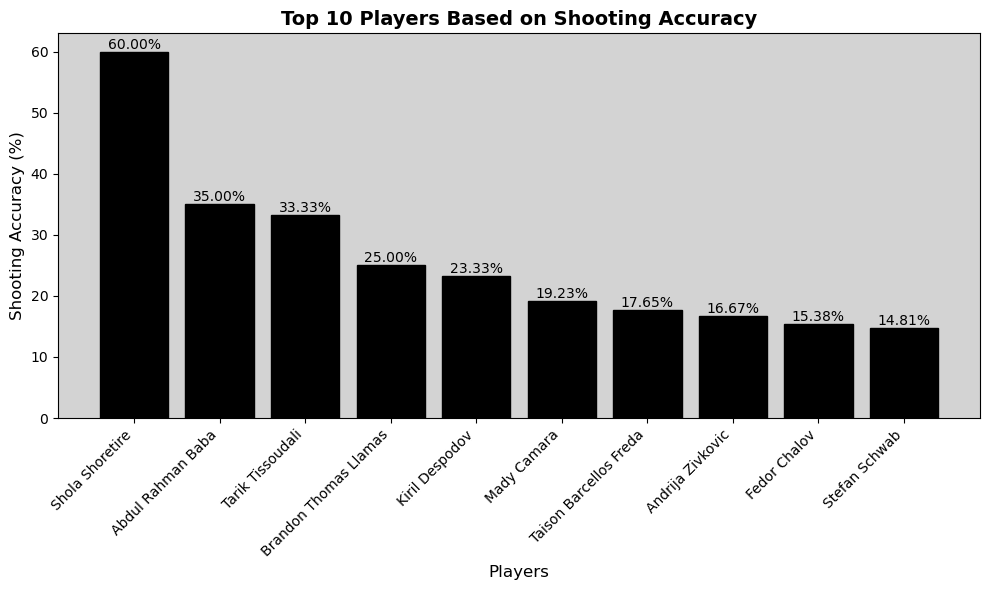

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(
    top10_acc["Όνομα"], 
    top10_acc["Ποσοστό ευστοχίας"], 
    color="black", 
    edgecolor="black" 
)

# Adding annotations on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10, color="black")

# Adding Titles and Labels
plt.title("Top 10 Players Based on Shooting Accuracy", fontsize=14, fontweight='bold', color="black")
plt.xlabel("Players", fontsize=12, color="black")
plt.ylabel("Shooting Accuracy (%)", fontsize=12, color="black")
plt.xticks(rotation=45, ha='right', fontsize=10, color="black")  
plt.tight_layout()

# Dark background to match the theme
plt.gca().set_facecolor("lightgray") 
plt.show()

In [32]:
most_shoots = df2.sort_values(by='Τελική προσπάθεια',ascending=False). \
head()[['Όνομα','Γκολ / Τελική προσπάθεια','Τελική προσπάθεια','Ασίστ','Ποσοστό ευστοχίας']]

most_shoots

,Όνομα,Γκολ / Τελική προσπάθεια,Τελική προσπάθεια,Ασίστ,Ποσοστό ευστοχίας
8,Tomasz Kedziora,0/92,92,0,0.00
15,Γιάννης Κωνσταντέλιας,3/46,46,1,6.52
24,Andrija Zivkovic,6/36,36,7,16.67
23,Taison Barcellos Freda,6/34,34,1,17.65
28,Kiril Despodov,7/30,30,7,23.33


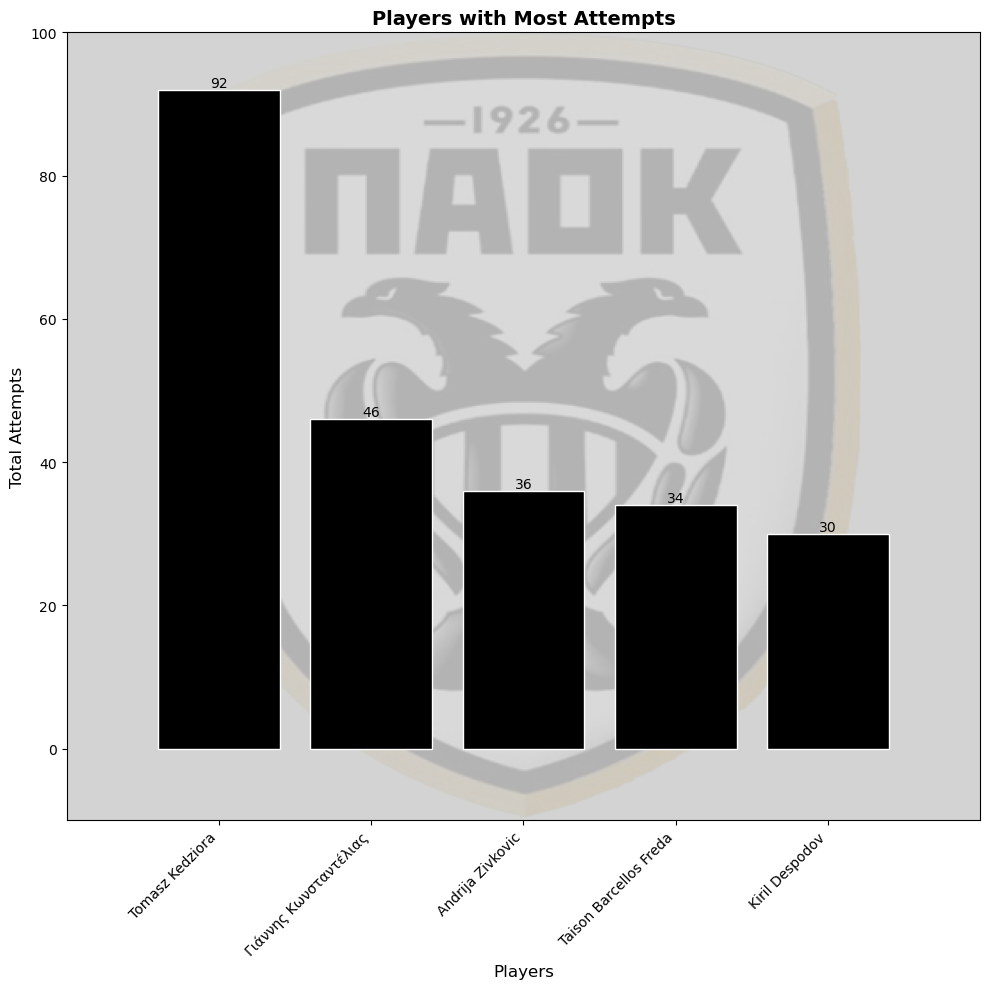

In [33]:
# Load the PAOK FC logo
logo_path = "paok_logo.png"  
logo_img = mpimg.imread('paok_badge.png')

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Add the transparent logo as the background
ax.imshow(logo_img, aspect='auto', extent=[-1, len(most_shoots["Όνομα"]), -10, 100], alpha=0.15)

# Bar chart
bars = ax.bar(
    most_shoots["Όνομα"], 
    most_shoots["Τελική προσπάθεια"], 
    color="black", 
    edgecolor="white"
)

# Adding annotations on bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f"{yval}", ha='center', va='bottom', fontsize=10, color="black")

# Adding Titles and Labels
ax.set_title("Players with Most Attempts", fontsize=14, fontweight='bold', color="black")
ax.set_xlabel("Players", fontsize=12, color="black")
ax.set_ylabel("Total Attempts", fontsize=12, color="black")
ax.set_xticks(range(len(most_shoots["Όνομα"])))
ax.set_xticklabels(most_shoots["Όνομα"], rotation=45, ha='right', fontsize=10, color="black")
ax.set_facecolor("lightgray")

# Adjust layout for better visibility
plt.tight_layout()

### Possible error in data gathering of Tomas Kedziora